In [1]:
import control as ct
import numpy as np
import control.optimal as opt
import matplotlib.pyplot as plt

In [2]:
A = [[0.99, 0.01, 0.18, -0.09,   0],
     [   0, 0.94,    0,  0.29,   0],
     [   0, 0.14, 0.81,  -0.9,   0],
     [   0, -0.2,    0,  0.95,   0],
     [   0, 0.09,    0,     0, 0.9]]
B = [[ 0.01, -0.02],
     [-0.14,     0],
     [ 0.05,  -0.2],
     [ 0.02,     0],
     [-0.01, 0]]
C = [[0, 1, 0, 0, -1],
     [0, 0, 1, 0,  0],
     [0, 0, 0, 1,  0],
     [1, 0, 0, 0,  0]]
model = ct.ss2io(ct.ss(A, B, C, 0, 0.2))


In [8]:
sys = ct.ss2io(ct.ss(A, B, np.eye(5), 0, 0.2))

ud = np.array([0.8, -0.3])
xd = np.linalg.inv(np.eye(5) - A) @ B @ ud
yd = C @ xd

In [9]:
constraints = [opt.input_range_constraint(sys, [-5, -6], [5, 6])]

Q = model.C.transpose() @ np.diag([10, 10, 10, 10]) @ model.C
R = np.diag([3, 2])
cost = opt.quadratic_cost(model, Q, R, x0=xd, u0=ud)

ctrl = opt.create_mpc_iosystem(model, np.arange(0, 6) * 0.2, cost, constraints)

In [10]:
loop = ct.feedback(sys, ctrl, 1)
print(loop)

System: sys[6]
Inputs (2): u[0], u[1], 
Outputs (5): y[0], y[1], y[2], y[3], y[4], 
States (17): sys[4]_x[0], sys[4]_x[1], sys[4]_x[2], sys[4]_x[3], sys[4]_x[4], sys[5]_x[0], sys[5]_x[1], sys[5]_x[2], sys[5]_x[3], sys[5]_x[4], sys[5]_x[5], sys[5]_x[6], sys[5]_x[7], sys[5]_x[8], sys[5]_x[9], sys[5]_x[10], sys[5]_x[11], 


In [11]:
import time

# loop = ClosedLoop(ctrl, model);
# x0 = [0, 0, 0, 0, 0]
Nsim = 60

start = time.time()
tout, xout = ct.input_output_response(loop, np.arange(0, Nsim) * 0.2, 0, 0)
end = time.time()
print("Computation time = %g seconds" % (end-start))

Computation time = 13.6152 seconds


array([-0.15441668,  0.00362027,  0.07760195,  0.00675155,  0.00698112])

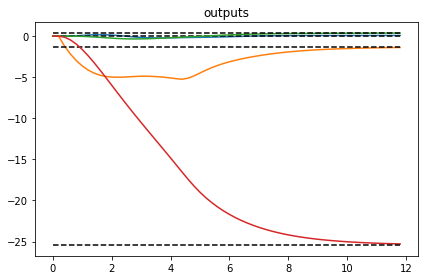

In [12]:
for i, y in enumerate(C @ xout):
    plt.plot(tout, y)
    plt.plot(tout, yd[i] * np.ones(tout.shape), 'k--')
plt.title('outputs')

# plt.subplot(2, 1, 2)
# plt.plot(t, u);
# plot(np.range(Nsim), us*ones(1, Nsim), 'k--')
# plt.title('inputs')

plt.tight_layout()

# Print the final error
xd - xout[:,-1]